In [1]:
# Import packages

# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
cln = ['number_of_times_pregnant', 
       'plasma_glucose_concentration', # a 2 hours in an oral glucose tolerance test
       'diastolic_blood_pressure', # (mm Hg)
       'triceps_skin_fold_thickness', # (mm)
       'two_hour_serum_insulin', # (mu U/ml)
       'body_mass_index', # (weight in kg/(height in m)^2)
       'diabetes_pedigree_function', 
       'age', # (years)
       'Class'] # variable (0 or 1)]

# Import DataFrame
df = pd.read_csv('pima-indians-diabetes.csv', names=cln, engine='pyarrow') 
df.head()

,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")

missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (768, 9)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['number_of_times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_skin_fold_thickness', 'two_hour_serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age', 'Class']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   number_of_times_pregnant      768 non-null    int64  
 1   plasma_glucose_concentration  768 non-null    int

number_of_times_pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64


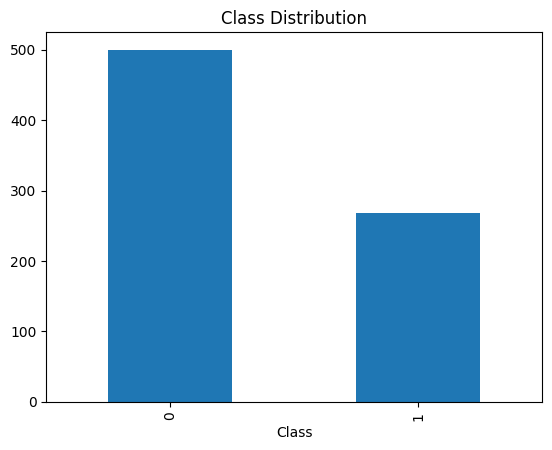

plasma_glucose_concentration
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64


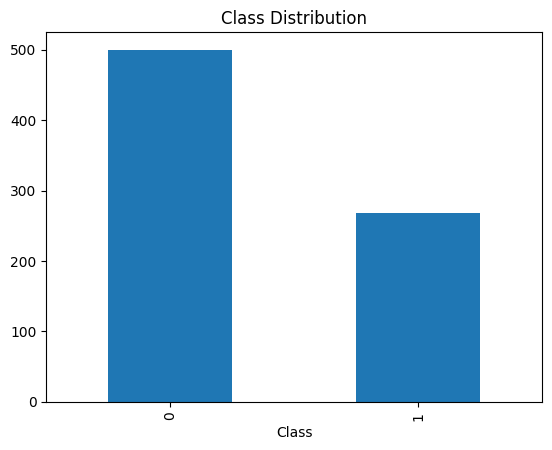

diastolic_blood_pressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64


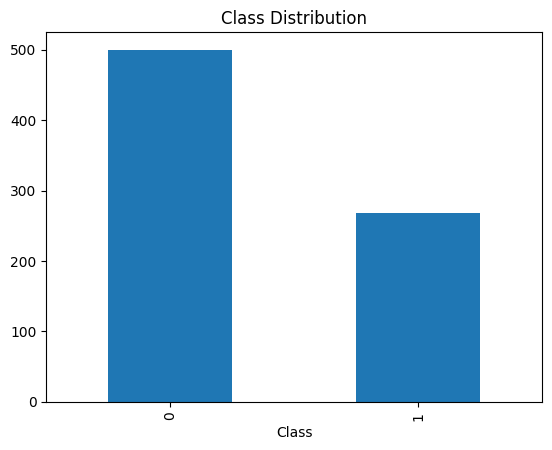

triceps_skin_fold_thickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64


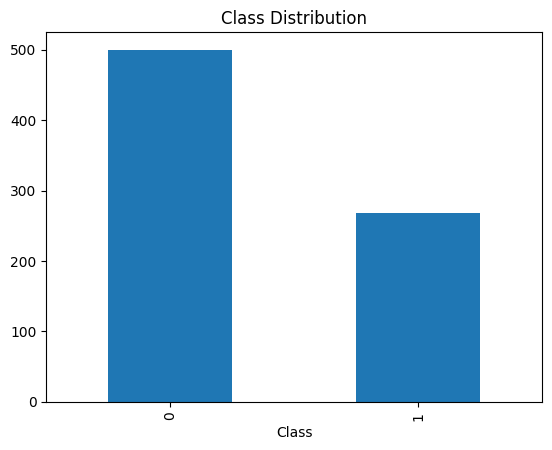

two_hour_serum_insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64


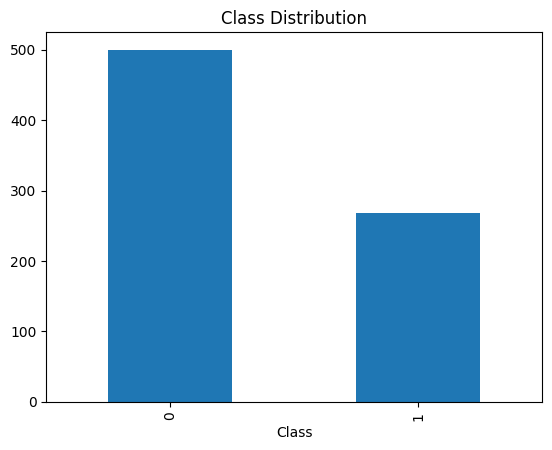

age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64


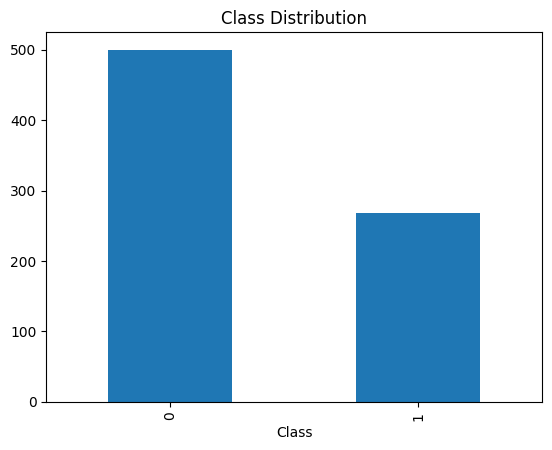

Class
0    500
1    268
Name: count, dtype: int64


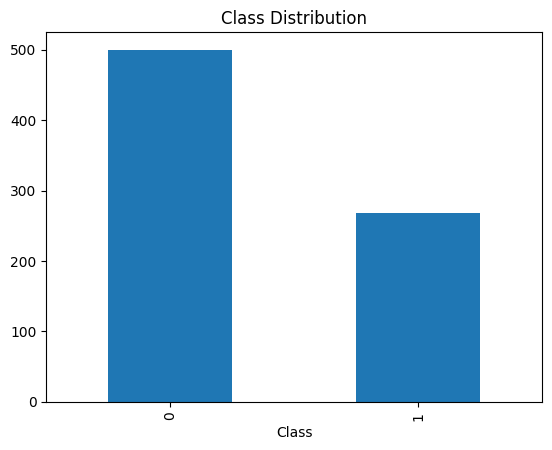

In [9]:
# Value_counts - Unique
# objects = df.select_dtypes(include=['object','category'])
for col in df.select_dtypes(include=['int']).columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].value_counts())
    df['Class'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.show()

In [10]:
# Oversampling (Increase minority class)
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

df_minority_upsampled = resample(df_minority, 
                                replace=True,     # sample with replacement
                                n_samples=len(df_majority),    # to match majority class
                                random_state=42)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Always reset index (it’s a must to do)
df_balanced = df_balanced.reset_index(drop=True) 

In [12]:
df_balanced.to_csv('balanced_pima_diabetes.csv', index=False)

In [13]:
df = df_balanced

## AdaBoostClassifier

Dataset shape: (1000, 8)
Feature names: Index(['number_of_times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_skin_fold_thickness', 'two_hour_serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age'], dtype='object')
Number of classes: 2
Class distribution: [500 500]

X Train shape: (800, 8)
Y Train shape: (800,)
X Test shape: (200, 8)
Y Test shape: (200,)
-------------------------------------------------------------------------------------------------------------------------------

--- Basic AdaBoost Model ---
Accuracy test set: 0.7400
Accuracy train set: 0.7887

 --- Classification Report: ---
Classification Report test set:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        96
           1       0.77      0.72      0.74       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74 

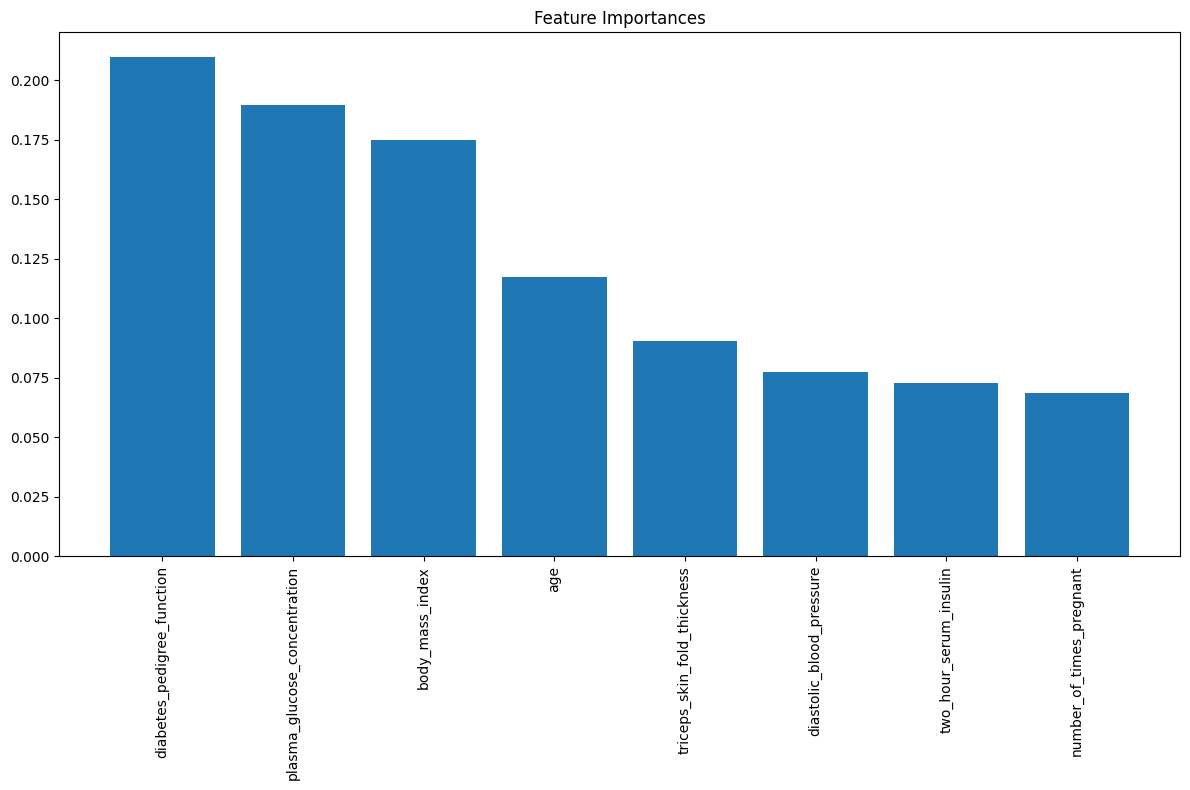


--- Confusion Matrix ---


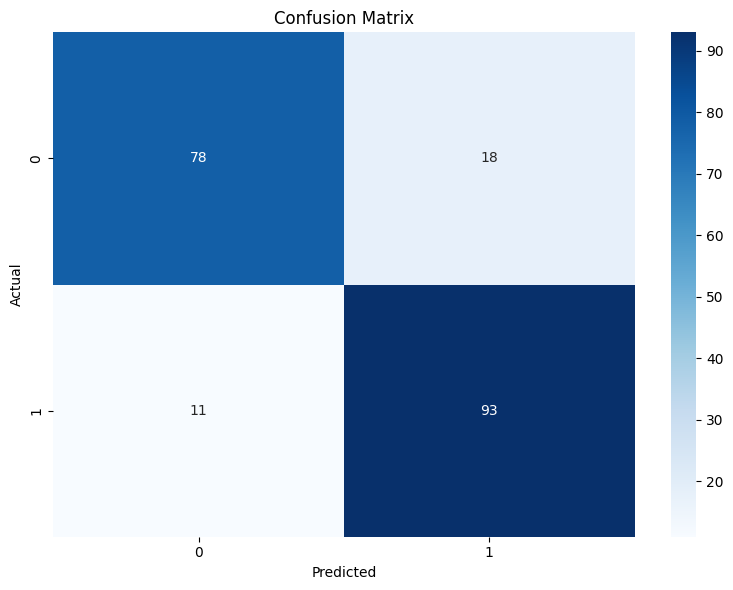


--- ROC Curve ---


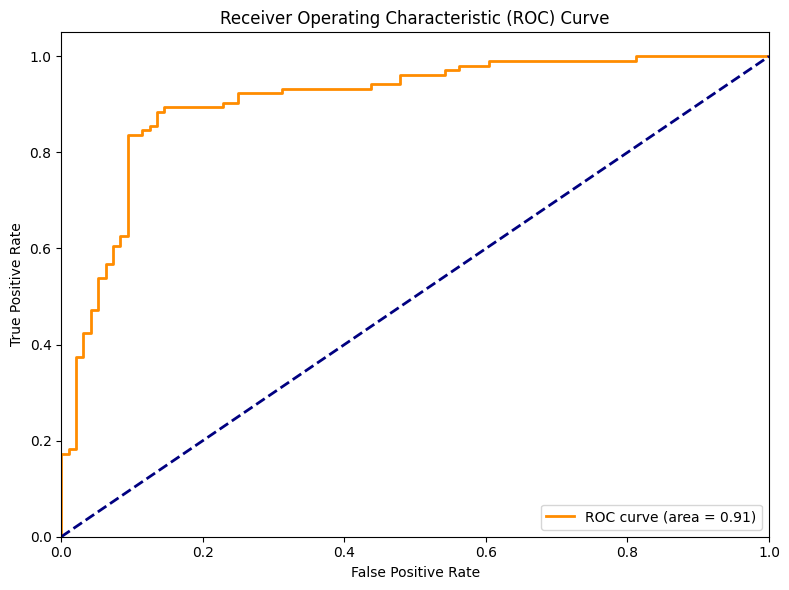


--- Learning Curve ---


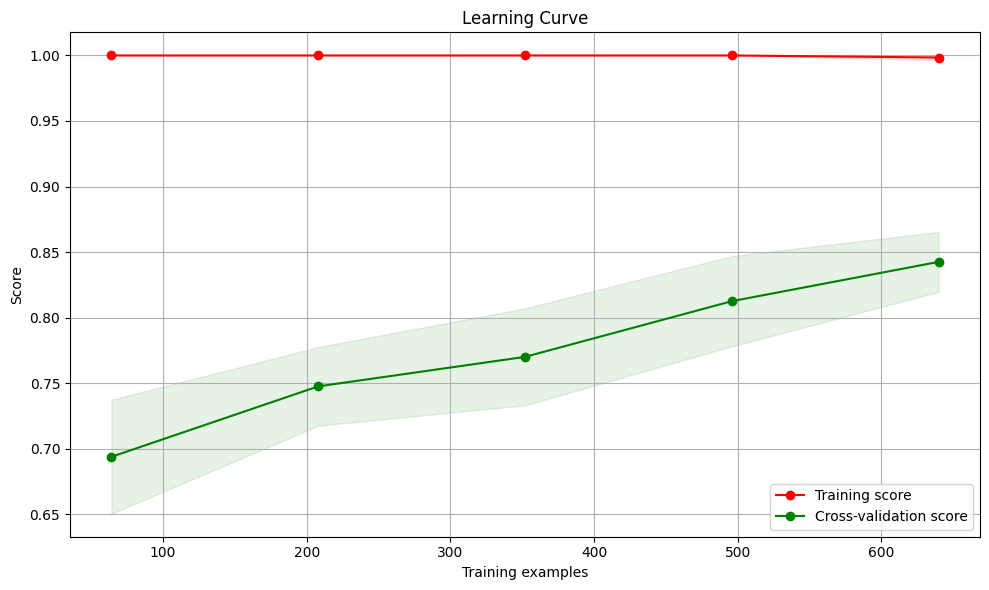


--- Effect of Learning Rate ---


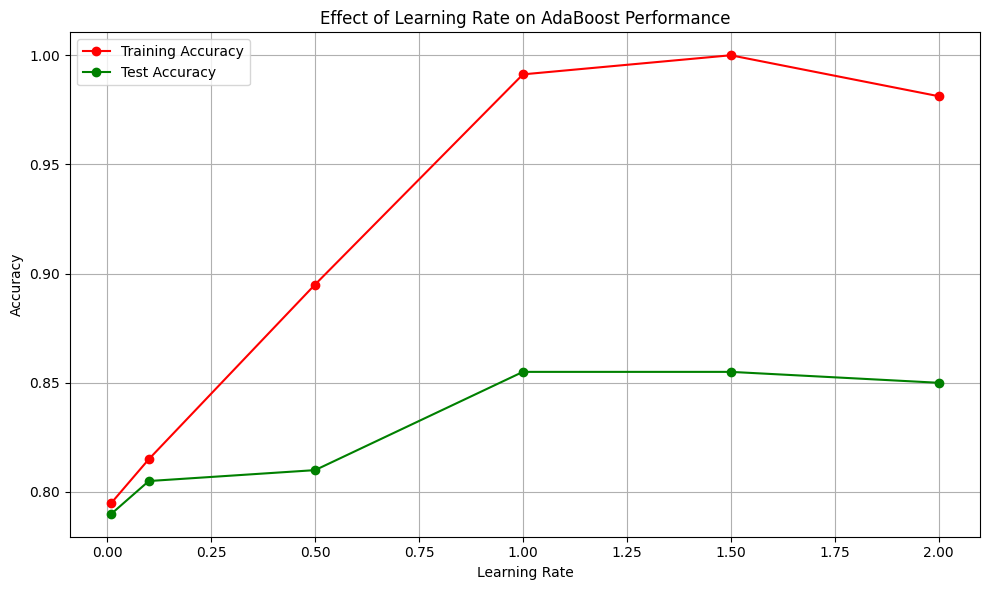


--- Effect of Number of Estimators ---


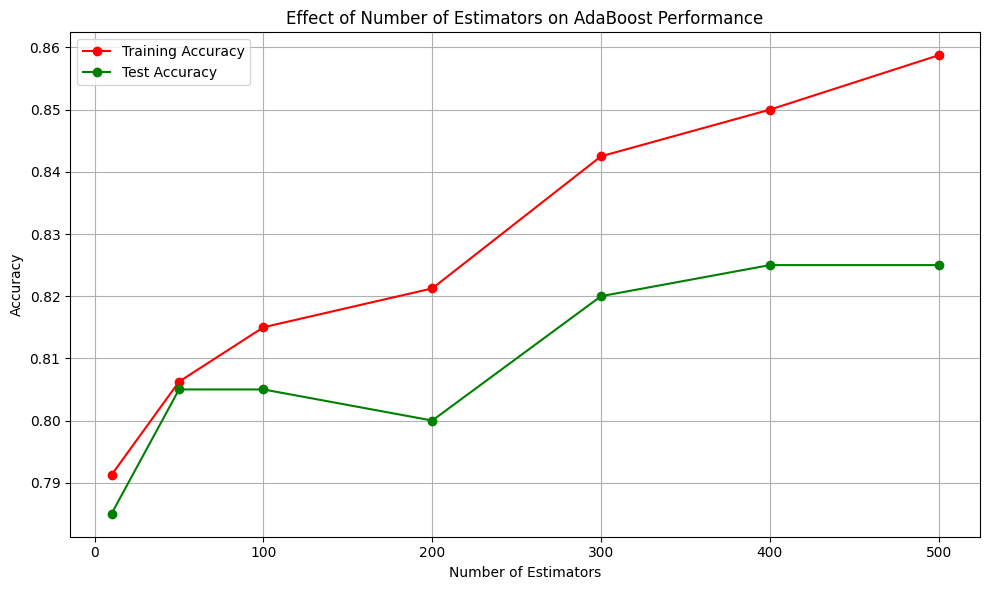


--- Pipeline with AdaBoost ---
Best pipeline parameters: {'adaboost__n_estimators': 100, 'adaboost__learning_rate': 1.0, 'adaboost__estimator': DecisionTreeClassifier(max_depth=3, random_state=42)}
Best cross-validation score: 0.8425

Pipeline test accuracy:  0.8550
Pipeline train accuracy: 0.9912

--- Model Comparison ---
Base AdaBoost accuracy: 0.7400
Grid Search tuned accuracy: 0.8550
Pipeline tuned accuracy: 0.8550

Basic Model Logistic Regression Cross-Validation Scores: [0.765 0.745 0.795 0.775 0.77 ]
Basic Model Pipeline Cross-Validation Scores: [0.85  0.795 0.855 0.855 0.85 ]
Tuned Model Grid Search Cross-Validation Scores: [0.845 0.795 0.855 0.86  0.85 ]

Basic Model Average CV Score ADA:      0.7700 ± 0.0161
Basic Model Average CV Score Pipe ADA: 0.8410 ± 0.0231
Tuned Model Average CV Score Grid ADA: 0.8410 ± 0.0235
-------------------------------------------------------------------------------------------------------------------------------
Final Classification Report:
Base

,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,0
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,1


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,1


In [15]:
# Set random seed for reproducibility
np.random.seed(42)

# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic AdaBoost model with default parameters
print("\n--- Basic AdaBoost Model ---")
base_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)
y_pred_train = base_model.predict(X_train_scaled)

print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\n --- Classification Report: ---")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Grid search for hyperparameter tuning
print("\n--- Grid Search for Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

# Create base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42, algorithm='SAMME')

# Create grid search
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}\n")

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_grid = best_model.predict(X_test_scaled)
y_pred_grid_train = best_model.predict(X_train_scaled)
print(f"Test accuracy with best model test set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Test accuracy with best model train set: {accuracy_score(y_train, y_pred_grid_train):.4f}")

# Visualize feature importances
def plot_feature_importance(model, feature_names):
    # For AdaBoost, feature_importances_ is available after fitting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For pipeline, need to access the classifier
        importances = model.named_steps['adaboost'].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

print("\n--- Feature Importances ---")
plot_feature_importance(best_model, X_train.columns)

# confusion matrix 
def plot_confusion_matrix(y_true, y_pred, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    
    # If classes not provided, determine them automatically
    if classes is None:
        classes = sorted(set(y_true) | set(y_pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

print("\n--- Confusion Matrix ---")
plot_confusion_matrix(y_test, y_pred_grid)

# ROC curve
def plot_roc_curve(model, X, y):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

print("\n--- ROC Curve ---")
plot_roc_curve(best_model, X_test_scaled, y_test)

# Learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5, n_jobs=-1):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

print("\n--- Learning Curve ---")
plot_learning_curve(best_model, X_train_scaled, y_train)

# Effect of different learning rates
def plot_learning_rate_effect():
    learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
    train_scores = []
    test_scores = []
    
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=100,
            learning_rate=lr,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(learning_rates, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of Learning Rate on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Learning Rate ---")
plot_learning_rate_effect()

# Effect of number of estimators
def plot_n_estimators_effect():
    n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
    train_scores = []
    test_scores = []
    
    for n_est in n_estimators_range:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=n_est,
            learning_rate=0.1,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(n_estimators_range, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Estimators on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Number of Estimators ---")
plot_n_estimators_effect()

# Pipeline example with AdaBoost
print("\n--- Pipeline with AdaBoost ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
])

# Parameters for pipeline
pipeline_params = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1, random_state=42),
                           DecisionTreeClassifier(max_depth=3, random_state=42)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Randomized search to speed up the tuning process
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=pipeline_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)  # Note: Using unscaled data since scaling is part of the pipeline

# Print best parameters
print(f"Best pipeline parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}\n")

# Evaluate the best pipeline model
best_pipeline = random_search.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)
y_pred_pipeline_train = best_pipeline.predict(X_train)
print(f"Pipeline test accuracy:  {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Pipeline train accuracy: {accuracy_score(y_train, y_pred_pipeline_train):.4f}")

# Compare basic and tuned models
print("\n--- Model Comparison ---")
print(f"Base AdaBoost accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Grid Search tuned accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Pipeline tuned accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_ada = cross_val_score(base_model, X, y, cv=5, scoring='accuracy')
cv_scores_basic_ada_grid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_ada_grid = cross_val_score(best_pipeline, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_ada}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_ada_grid}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_ada_grid}\n")

print(f"Basic Model Average CV Score ADA:      {cv_scores_basic_ada.mean():.4f} ± {cv_scores_basic_ada.std():.4f}")
print(f"Basic Model Average CV Score Pipe ADA: {cv_scores_basic_ada_grid.mean():.4f} ± {cv_scores_basic_ada_grid.std():.4f}")
print(f"Tuned Model Average CV Score Grid ADA: {cv_scores_tuned_ada_grid.mean():.4f} ± {cv_scores_tuned_ada_grid.std():.4f}")
print("-" * 127) 

# Print final classification report
print("Final Classification Report:")
print(f"Base AdaBoost accuracy:\n {classification_report(y_test, y_pred)}\n")
print(f"Grid Search tuned accuracy:\n {classification_report(y_test, y_pred_grid)}\n")
print(f"Pipeline tuned accuracy:\n {classification_report(y_test, y_pred_pipeline)}")

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head())

## BaggingClassifier

Dataset shape: (1000, 8)
Feature names: Index(['number_of_times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_skin_fold_thickness', 'two_hour_serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age'], dtype='object')
Number of classes: 2
Class distribution: [500 500]

X Train shape: (800, 8)
Y Train shape: (800,)
X Test shape: (200, 8)
Y Test shape: (200,)
-------------------------------------------------------------------------------------------------------------------------------
BaggingClassifier Accuracy test set: 0.8700
BaggingClassifier Accuracy train set: 0.9925
Starting grid search...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Grid search completed!

Best parameters: {'bootstrap': False, 'bootstrap_features': False, 'estimator__max_depth': None, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 50}
Best cross-validation score: 0.8700

Tuned BaggingClassifier Accuracy: 0.8700
Improvement: 0.0000

Classif

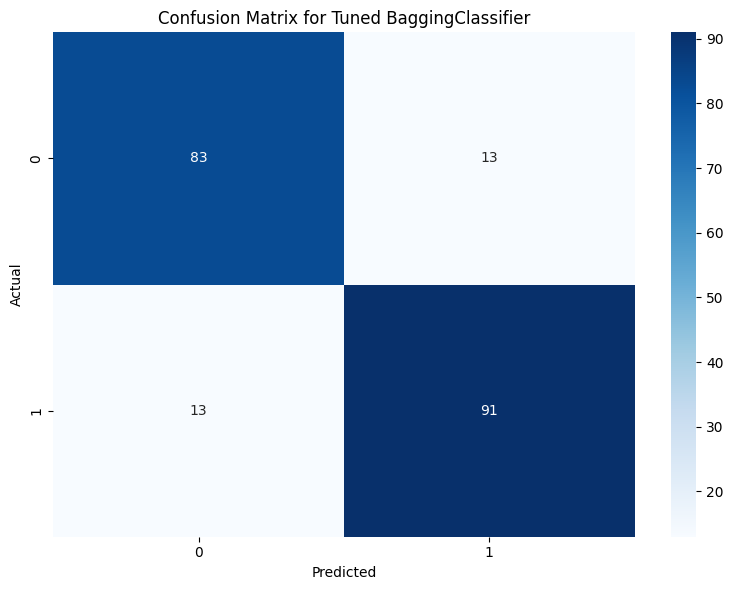

Feature importances not available for this model


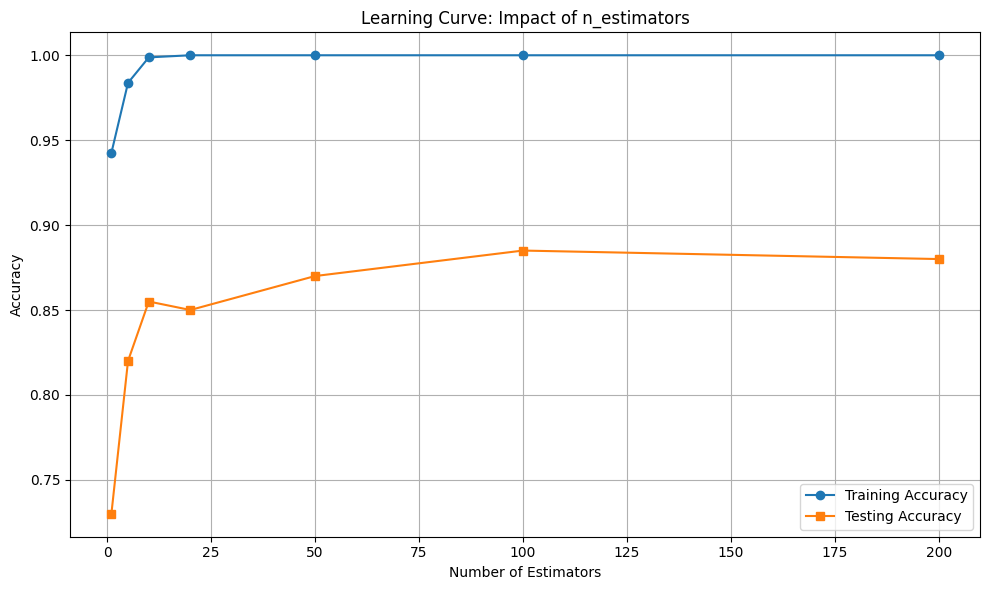

,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,1


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,1


In [16]:
# Bagging Tuning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (Decision Tree in this case)
base_clf = DecisionTreeClassifier(random_state=42)

# Create and train a simple BaggingClassifier with default parameters
bag_clf = BaggingClassifier(estimator=base_clf, random_state=42)
bag_clf.fit(X_train_scaled, y_train)

# Evaluate initial model
y_pred = bag_clf.predict(X_test_scaled)
y_pred_train = bag_clf.predict(X_train_scaled)

# Initial accuracy
initial_accuracy = accuracy_score(y_test, y_pred)

print(f"BaggingClassifier Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"BaggingClassifier Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(estimator=base_clf, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to find best parameters
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)
print("Grid search completed!")

# Get best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}\n")

# Get the best model
best_bag_clf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_bag_clf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned BaggingClassifier Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {tuned_accuracy - initial_accuracy:.4f}")

# Generate classification report
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_tuned)
classes = sorted(y_test.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned BaggingClassifier')
plt.tight_layout()
plt.show()

# Visualize feature importance (if available)
if hasattr(best_bag_clf, 'feature_importances_'):
    feature_importances = best_bag_clf.estimator_.feature_importances_
    feature_names = X_train.columns
    
    # Get top 10 features
    indices = np.argsort(feature_importances)[::-1][:10]
    
    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Feature Importances')
    plt.bar(range(10), feature_importances[indices])
    plt.xticks(range(10), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this model")

# Analyzing the impact of n_estimators
n_estimators_range = [1, 5, 10, 20, 50, 100, 200]
train_scores = []
test_scores = []

for n_estimators in n_estimators_range:

    # Create model with current n_estimators value
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=best_bag_clf.estimator_.max_depth),
        n_estimators=n_estimators,
        max_samples=best_bag_clf.max_samples,
        max_features=best_bag_clf.max_features,
        bootstrap=best_bag_clf.bootstrap,
        bootstrap_features=best_bag_clf.bootstrap_features,
        random_state=42
    )
    
    # Train model
    bag.fit(X_train_scaled, y_train)
    
    # Evaluate on train and test sets
    train_score = accuracy_score(y_train, bag.predict(X_train_scaled))
    test_score = accuracy_score(y_test, bag.predict(X_test_scaled))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Impact of n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head()) 


## Logistic Regression

Dataset shape: (1000, 8)
Feature names: Index(['number_of_times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_skin_fold_thickness', 'two_hour_serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age'], dtype='object')
Number of classes: 2
Class distribution: [500 500]

X Train shape: (800, 8)
Y Train shape: (800,)
X Test shape: (200, 8)
Y Test shape: (200,)
-------------------------------------------------------------------------------------------------------------------------------
--- Basic Model Performance ---
Accuracy test set: 0.7750
Accuracy train set: 0.7300

Classification Report:
Classification Report test set:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77        96
           1       0.79      0.78      0.78       104

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.78      0.78       2

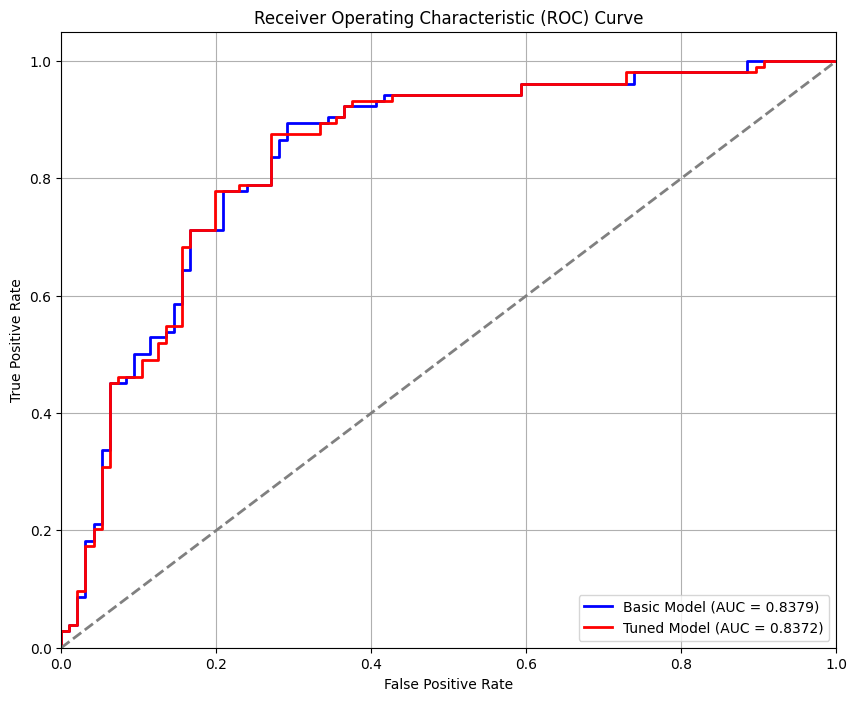

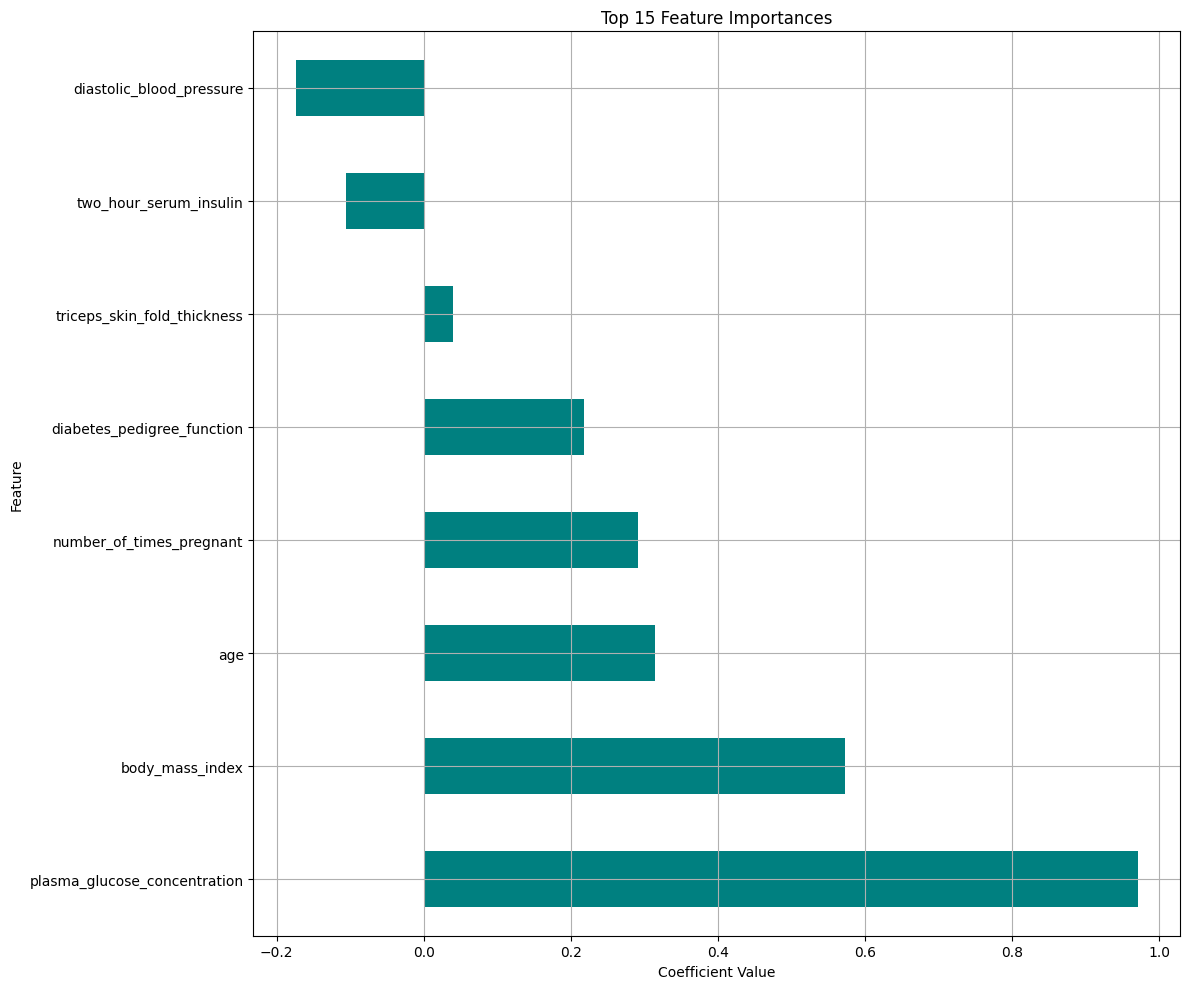

--- Top 10 Most Important Features ---
                              Coefficient
plasma_glucose_concentration     0.970995
body_mass_index                  0.572603
age                              0.314555
number_of_times_pregnant         0.291920
diabetes_pedigree_function       0.217712
triceps_skin_fold_thickness      0.040231
two_hour_serum_insulin          -0.105318
diastolic_blood_pressure        -0.174216
--- Bottom 10 Least Important Features ---
                              Coefficient
plasma_glucose_concentration     0.970995
body_mass_index                  0.572603
age                              0.314555
number_of_times_pregnant         0.291920
diabetes_pedigree_function       0.217712
triceps_skin_fold_thickness      0.040231
two_hour_serum_insulin          -0.105318
diastolic_blood_pressure        -0.174216
-------------------------------------------------------------------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/py

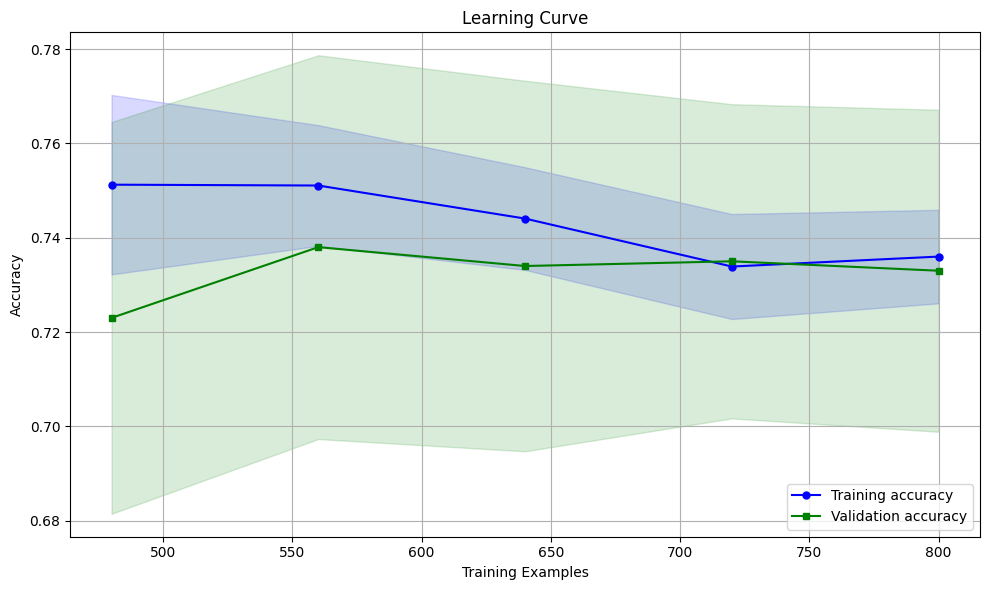

,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,0
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,0
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,0
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


In [17]:
# Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

feature_names = X_train.columns  # or X.columns
target_names = y_train.values # or y.values 

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")
print("-" * 127)  

# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_pipeline)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("—- Confusion Matrix: -—")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred_pipeline)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")
print("-" * 127)  

# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],          # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],                               # Regularization type
    'classifier__solver': ['liblinear', 'saga'],                 # Algorithm to use
    'classifier__max_iter': [10000, 50000, 100000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']      # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned),'\n')
print(classification_report(y_train, y_pred_tuned_train))
print("-" * 127)   

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Basic Model Accuracy Pipeline: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
cv_scores_basic_pipe = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_grid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_lr}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_pipe}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_grid}\n")

print(f"Basic Model Average CV Score LR:     {cv_scores_basic_lr.mean():.4f} ± {cv_scores_basic_lr.std():.4f}")
print(f"Basic Model Average CV Score Pipe:  {cv_scores_basic_pipe.mean():.4f} ± {cv_scores_basic_pipe.std():.4f}")
print(f"Tuned Model Average CV Score Grid:  {cv_scores_tuned_grid.mean():.4f} ± {cv_scores_tuned_grid.std():.4f}")
print("-" * 127)  

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print("-" * 127)  

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_lr, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_tuned, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head())  

## RandomForestClassifier

Dataset shape: (1000, 8)
Feature names: Index(['number_of_times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_skin_fold_thickness', 'two_hour_serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age'], dtype='object')
Number of classes: 2
Class distribution: [500 500]

X Train shape: (800, 8)
Y Train shape: (800,)
X Test shape: (200, 8)
Y Test shape: (200,)
-------------------------------------------------------------------------------------------------------------------------------
--- Baseline Random Forest Results ---
Accuracy Test set: 0.9050
Accuracy Train set: 1.0000
Classification Report:
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90        96
           1       0.90      0.91      0.91       104

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90     

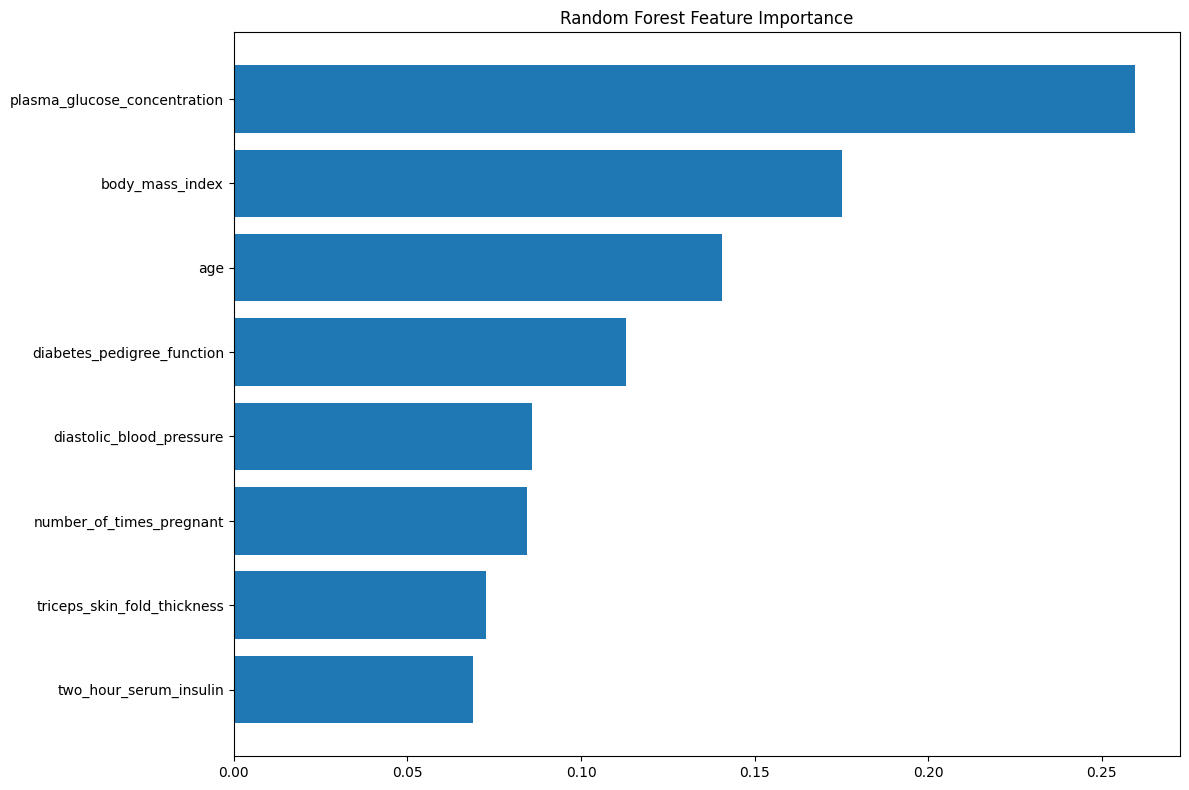

Cross-validation scores: [0.8375  0.88125 0.83125 0.85625 0.875  ]
Mean CV accuracy: 0.8562
Standard deviation: 0.0198
-------------------------------------------------------------------------------------------------------------------------------


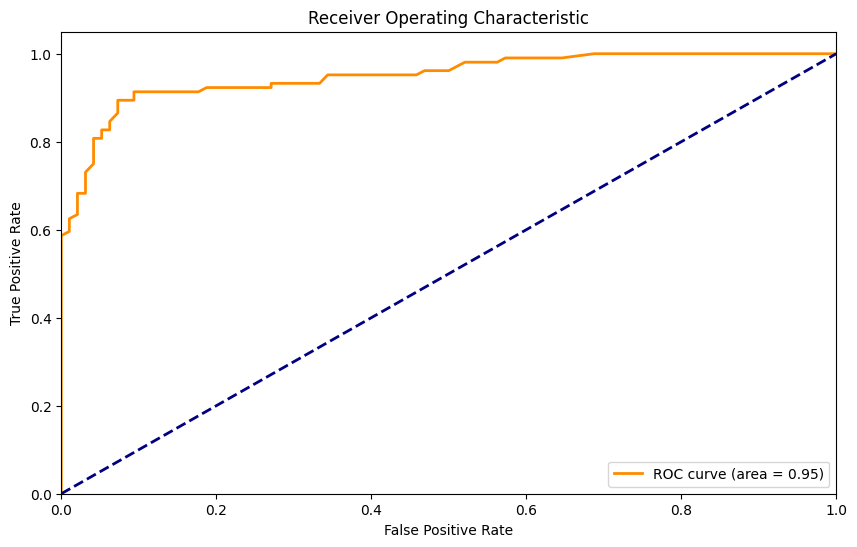

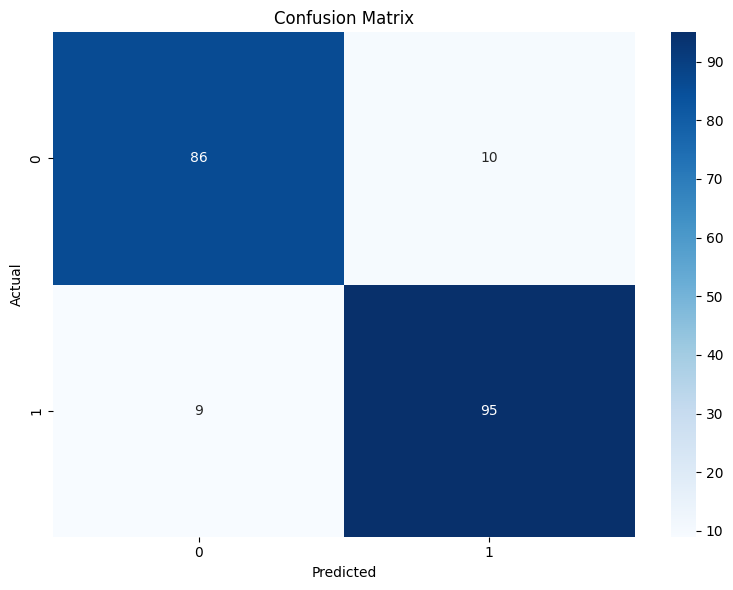

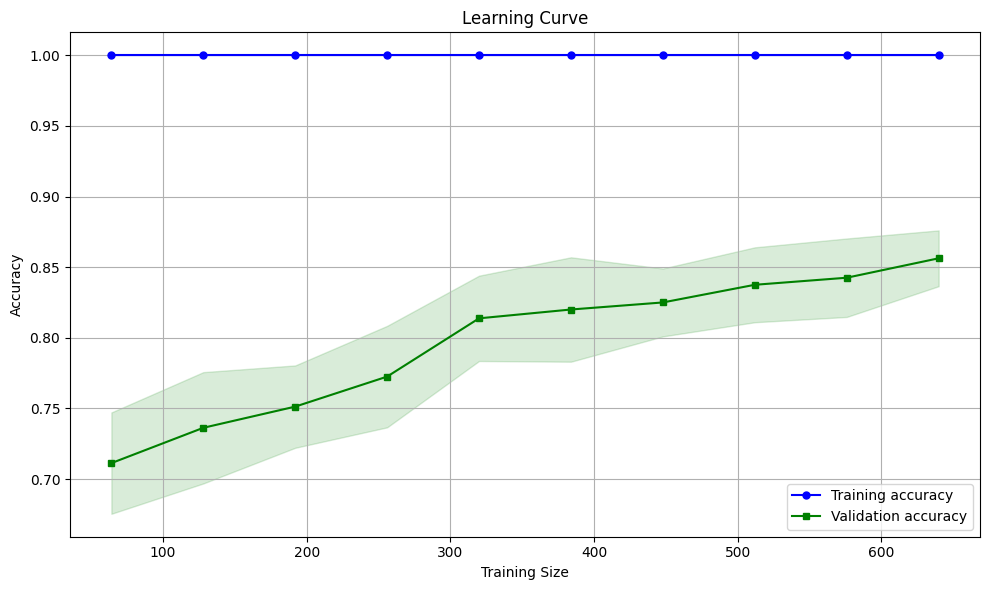

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 50
Fine-tuned accuracy: 0.8588
-------------------------------------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy Test: 0.8900
Accuracy Train: 1.0000
Classification Report:

Classification Report Test: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        96
           1       0.89      0.89      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200
 

Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00 

,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,prediction
521,4,117,62,12,0,29.7,0.380,30,1
737,7,187,68,39,304,37.7,0.254,41,1
740,8,105,100,36,0,43.3,0.239,45,1
660,10,108,66,0,0,32.4,0.272,42,1
411,0,132,78,0,0,32.4,0.393,21,0


In [18]:
# RandomForest Tuning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.datasets import load_breast_cancer

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = ['0', '1']

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train set: {accuracy_score(y_train, y_pred_base_train):.4f}")
print("Classification Report:")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_base, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_base_train, target_names=target_names))
print('-' *127)

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")
print('-' *127)

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_grid, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_grid_train, target_names=target_names))
print('-' *127)

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

# 7. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
#plt.close()
plt.show()

# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()

# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *127)

# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_final_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_final, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_final_train, target_names=target_names))
print('-' *127)

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Basic Model Accuracy Pipeline Grid: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_final):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_rf = cross_val_score(rf_base, X, y, cv=5, scoring='accuracy')
cv_scores_basic_rf_grid = cross_val_score(best_grid_model, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_rf_grid = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_rf}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_rf_grid}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_rf_grid}\n")

print(f"Basic Model Average CV Score RF:      {cv_scores_basic_rf.mean():.4f} ± {cv_scores_basic_rf.std():.4f}")
print(f"Basic Model Average CV Score Pipe RF: {cv_scores_basic_rf_grid.mean():.4f} ± {cv_scores_basic_rf_grid.std():.4f}")
print(f"Tuned Model Average CV Score Grid RF: {cv_scores_tuned_rf_grid.mean():.4f} ± {cv_scores_tuned_rf_grid.std():.4f}")
print("-" * 127)  

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_base, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_final, 3)
display(pipe_model_df.head())  

## XGBClassifier

In [19]:
# 1. Basic Manual Tuning
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic XGBoost with default parameters
xgb_default = xgb.XGBClassifier(random_state=42)
xgb_default.fit(X_train, y_train)
y_pred = xgb_default.predict(X_test)
y_pred_train = xgb_default.predict(X_train)
print(f"Default accuracy test: {accuracy_score(y_test, y_pred):.4f}")
print(f"Default accuracy train: {accuracy_score(y_train, y_pred_train):.4f}")

# Manual tuning - trying different parameter combinations
xgb_tuned = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)
y_pred_tuned_train = xgb_tuned.predict(X_train)
print(f"Manually tuned test accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Manually tuned train accuracy: {accuracy_score(y_train, y_pred_tuned_train):.4f}")
print("-" * 127)  

## 2. Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)
y_pred_grid_train = best_model.predict(X_train)
print(f"Grid search test accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Grid search train accuracy: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("-" * 127)  

## 3. Randomized Search (More Efficient)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions
param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
print("-" * 127)   

## 4. Bayesian Optimization with Optuna
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42,
        'eval_metric': 'logloss'
    }
    
    # Create model and evaluate
    model = xgb.XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best score:", study.best_value)
print("-" * 127)   

# Train final model with best parameters
best_xgb = xgb.XGBClassifier(**study.best_params)
best_xgb.fit(X_train, y_train)

## 5. Progressive Tuning Strategy
# Step 1: Tune number of estimators first
def tune_n_estimators():
    param_grid = {'n_estimators': [50, 100, 200, 300, 500]}
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_estimators']

# Step 2: Tune max_depth and learning_rate
def tune_depth_and_lr(n_estimators):
    param_grid = {
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(n_estimators=n_estimators, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Step 3: Tune regularization and sampling parameters
def tune_regularization(best_params):
    param_grid = {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(**best_params, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Execute progressive tuning
best_n_estimators = tune_n_estimators()
print(f"Best n_estimators: {best_n_estimators}")

depth_lr_params = tune_depth_and_lr(best_n_estimators)
print(f"Best depth and learning rate: {depth_lr_params}")
print("-" * 127)   

# Combine parameters
combined_params = {'n_estimators': best_n_estimators}
combined_params.update(depth_lr_params)

final_params = tune_regularization(combined_params)
combined_params.update(final_params)

print(f"Final best parameters: {combined_params}")
print("-" * 127)   

# 6. Using Early Stopping
# Split training data for early stopping
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# XGBoost with early stopping
xgb_early = xgb.XGBClassifier(
    n_estimators=1000,  # Large number
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='logloss'
)

# Fit with early stopping
xgb_early.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=False
)

print(f"Best iteration: {xgb_early.best_iteration}")
print(f"Best score: {xgb_early.best_score}")
print("-" * 127)  

Dataset shape: (1000, 8)
Feature names: Index(['number_of_times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_skin_fold_thickness', 'two_hour_serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age'], dtype='object')
Number of classes: 2
Class distribution: [500 500]

X Train shape: (800, 8)
Y Train shape: (800,)
X Test shape: (200, 8)
Y Test shape: (200,)
-------------------------------------------------------------------------------------------------------------------------------
Default accuracy test: 0.8450
Default accuracy train: 1.0000
Manually tuned test accuracy: 0.8550
Manually tuned train accuracy: 1.0000
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best cross-valida

[I 2025-08-17 20:42:46,729] A new study created in memory with name: no-name-1d385c42-c6f3-4135-927c-2c727b46be95


Best parameters: {'colsample_bytree': 0.6122000999756197, 'learning_rate': 0.021204456624764327, 'max_depth': 8, 'n_estimators': 320, 'reg_alpha': 0.3601906414112629, 'reg_lambda': 0.12706051265188478, 'subsample': 0.8088973040219217}
Best cross-validation score: 0.85
-------------------------------------------------------------------------------------------------------------------------------


[I 2025-08-17 20:42:47,019] Trial 0 finished with value: 0.80625 and parameters: {'n_estimators': 93, 'max_depth': 3, 'learning_rate': 0.07784258332875273, 'subsample': 0.9354680517353782, 'colsample_bytree': 0.8451666985845867, 'reg_alpha': 0.32510873200756807, 'reg_lambda': 0.3953976884226095}. Best is trial 0 with value: 0.80625.
[I 2025-08-17 20:42:47,641] Trial 1 finished with value: 0.8400000000000001 and parameters: {'n_estimators': 271, 'max_depth': 4, 'learning_rate': 0.28495168784420916, 'subsample': 0.6811304665832865, 'colsample_bytree': 0.7826089153029515, 'reg_alpha': 0.4818567397146587, 'reg_lambda': 0.8759400285022452}. Best is trial 1 with value: 0.8400000000000001.
[I 2025-08-17 20:42:48,458] Trial 2 finished with value: 0.83125 and parameters: {'n_estimators': 373, 'max_depth': 5, 'learning_rate': 0.28521100272433086, 'subsample': 0.7976357525326413, 'colsample_bytree': 0.6672175990759043, 'reg_alpha': 0.32826613985245845, 'reg_lambda': 0.35033006541826217}. Best is 

Best parameters: {'n_estimators': 202, 'max_depth': 8, 'learning_rate': 0.17491846071663464, 'subsample': 0.617329361500093, 'colsample_bytree': 0.9612519227788321, 'reg_alpha': 0.6714995795274303, 'reg_lambda': 0.6295598363278179}
Best score: 0.85375
-------------------------------------------------------------------------------------------------------------------------------
Best n_estimators: 100
Best depth and learning rate: {'learning_rate': 0.1, 'max_depth': 6}
-------------------------------------------------------------------------------------------------------------------------------
Final best parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6, 'colsample_bytree': 1.0, 'reg_alpha': 0.5, 'reg_lambda': 0, 'subsample': 0.6}
-------------------------------------------------------------------------------------------------------------------------------
Best iteration: 110
Best score: 0.339642563292
----------------------------------------------------------------

In [25]:
print(f"The best model for Pima Diabetes Dataset was Random Forest with a Score of \
{accuracy_score(y_test, y_pred_base)} Points")

The best model for Pima Diabetes Dataset was Random Forest with a Score of 0.905 Points


In [26]:
df.head()

,number_of_times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,two_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0
